In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return

In [3]:
biomasa = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Boimasa.txt',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Biomasa.txt',
        delimiter = '\t',
        decimal = '.',
        )

In [4]:
resumen(biomasa)

Forma:
 (7, 4) 

 Columnas:
 Index(['Fecha', 'Sitio 1', 'Sitio 2', 'Sitio 3'], dtype='object') 

 Tipos:
 Fecha       object
Sitio 1    float64
Sitio 2    float64
Sitio 3    float64
dtype: object 

 Datos nulos:
 Fecha      0
Sitio 1    0
Sitio 2    0
Sitio 3    0
dtype: int64 

 Cabecera:
     Fecha      Sitio 1      Sitio 2      Sitio 3
0  23-feb  1665.922500  2741.985000  1425.181250
1  04-abr  3441.581250  2701.359375  1852.176563
2  18-may  2474.334375  2190.343750  2109.193750
3  28-jun  2680.234375  3841.062500  3078.968750
4  23-ago  2695.025000  2876.959375  3147.759375
5  11-oct  2757.820313  3065.500000  3606.779688
6  12-dic  2672.765625  2456.900000  2006.793750 

 Últimos datos:
     Fecha      Sitio 1      Sitio 2      Sitio 3
0  23-feb  1665.922500  2741.985000  1425.181250
1  04-abr  3441.581250  2701.359375  1852.176563
2  18-may  2474.334375  2190.343750  2109.193750
3  28-jun  2680.234375  3841.062500  3078.968750
4  23-ago  2695.025000  2876.959375  3147.759375
5  

In [5]:
relleno = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Relleno_LUT.txt',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Relleno_LUT.txt',
        delimiter = '\t',
        decimal = '.',
        )

In [6]:
resumen(relleno)

Forma:
 (14956, 3) 

 Columnas:
 Index(['DoY', 'Hour', 'NEE'], dtype='object') 

 Tipos:
 DoY     float64
Hour    float64
NEE     float64
dtype: object 

 Datos nulos:
 DoY     0
Hour    0
NEE     0
dtype: int64 

 Cabecera:
     DoY    Hour        NEE
0  54.0   9.125  -5.420715
1  54.0   9.625  -5.085344
2  54.0  10.125  -9.090980
3  54.0  10.625  -5.102692
4  54.0  11.125  -9.912271
5  54.0  11.625 -10.525742
6  54.0  12.125 -10.248600
7  54.0  12.625  -8.084139
8  54.0  13.125  -9.621505
9  54.0  13.625  -2.795167 

 Últimos datos:
          DoY    Hour       NEE
14946  365.0  18.125  2.204462
14947  365.0  18.625 -0.136065
14948  365.0  19.125 -0.136065
14949  365.0  19.625  3.289471
14950  365.0  20.125  3.289471
14951  365.0  20.625  3.289471
14952  365.0  21.125  3.289471
14953  365.0  21.625  3.289471
14954  365.0  22.125  3.289471
14955  365.0  22.625  3.289471 

 Estadísticos:
                 DoY          Hour           NEE
count  14956.000000  14956.000000  14956.000000
mea

In [11]:
dias = [54, 94, 138, 179, 235, 284, 346]
nee_lut = list(range(1, len(dias)))
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    datos_bimens = relleno[(relleno['DoY'] >= desde)
                           & (relleno['DoY'] < hasta)
                          ]
    nee_lut[i-1] = datos_bimens['NEE'].sum()*60*30/1000000*44

In [27]:
diferencia_1 = list(range(6))
diferencia_2 = list(range(6))
diferencia_3 = list(range(6))
for i in list(range(6)):
    diferencia_1[i] = biomasa['Sitio 1'][i+1] - biomasa['Sitio 1'][i]
    diferencia_2[i] = biomasa['Sitio 2'][i+1] - biomasa['Sitio 2'][i]
    diferencia_3[i] = biomasa['Sitio 3'][i+1] - biomasa['Sitio 3'][i]

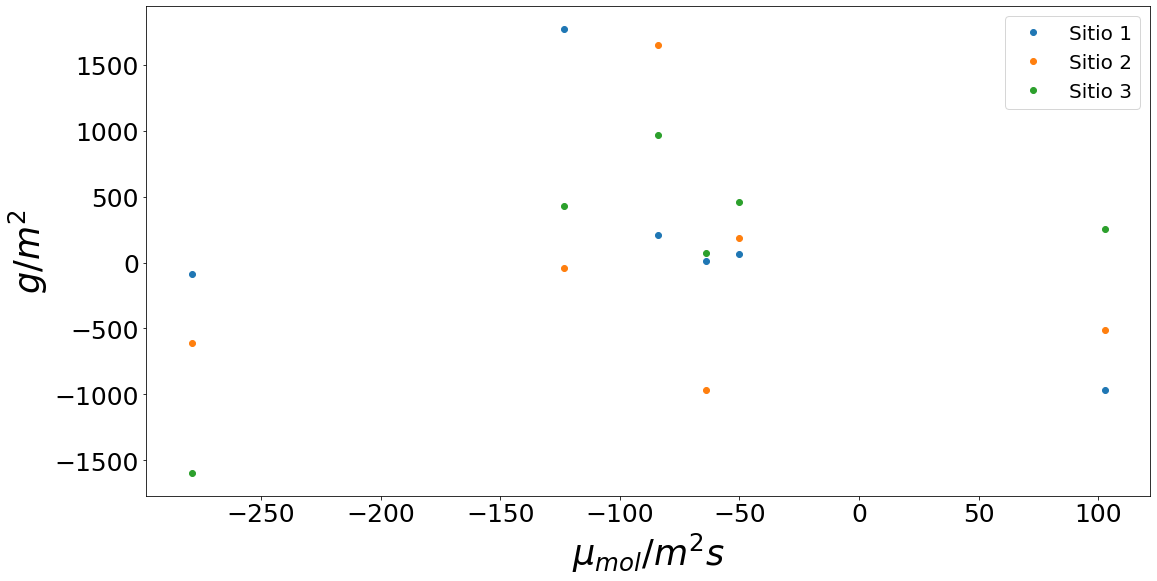

In [33]:
plt.figure(figsize=(18,9))
plt.plot(nee_lut, diferencia_1, 'o')
plt.plot(nee_lut, diferencia_2, 'o')
plt.plot(nee_lut, diferencia_3, 'o')
metadata('$\\mu_{mol}/m^2 s$', '$g/m^2$')
plt.legend(['Sitio 1', 'Sitio 2', 'Sitio 3'],
           fontsize = 20
          )

In [34]:
nee_lut

[-123.16145465307179,
 102.66214023849045,
 -84.24107743465156,
 -63.99917824888147,
 -50.32233748394625,
 -279.0721760883212]